In [ ]:
import pandas as pd

#Đọc file dữ liệu trên và Kiểm tra có dòng nào không có dữ liệu? Xóa các dòng không có dữ liệu
#Thay giá trị '?' thành NaN
data = pd.read_csv('mpg.csv', na_values=['?'])
data

#Kiểm tra có dòng nào không có dữ liệu
data_null = data.isnull().sum()
print(f"Số lượng các dòng có giá trị thiếu: {data_null}")

#Xoá các dòng không có dữ liệu
print(f"Số dòng sau khi xoá: {len(data.dropna())}")

#in dữ liệu sau khi xoá
data.dropna()



Số lượng các dòng có giá trị thiếu: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
Số dòng sau khi xoá: 398


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
#Tìm trung binh, trung vị của các thuộc tính: ‘cylinders’, ‘horsepower’, ‘weight’. Tìm miền giá trị và miền phân vị của thuộc tính ‘mpg’.

mean_cylinders = data['cylinders'].mean()
median_cylinders = data['cylinders'].median()

#Chuyển đổi kiểu dữ liệu thành float
data['horsepower'] = data['horsepower'].astype(float)
#Thay thế giá trị thiếu bằng trung bình của cột horsepower
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)
mean_horsepower = data['horsepower'].mean()
median_horsepower = data['horsepower'].median()

mean_weight = data['weight'].mean()
median_weight = data['weight'].median()

print(f"Trung bình của 'cylinders': {mean_cylinders}, Trung vị của 'cylinders': {median_cylinders}")
print(f"Trung bình của 'horsepower': {mean_horsepower}, Trung vị của 'horsepower': {median_horsepower}")
print(f"Trung bình của 'weight': {mean_weight}, Trung vị của 'horsepower': {median_weight}")

#Miền giá trị
mpg_min = data['mpg'].min()
mpg_max = data['mpg'].max()
print(f"Miền giá trị của mpg: {mpg_min} đến {mpg_max}")
#Miền phân vị
mpg_quantiles = data['mpg'].quantile([0.25, 0.5, 0.75])
print(f"Miền phân vị mpg: \n{mpg_quantiles}")


Số lượng các dòng có giá trị thiếu: 6
Trung bình của 'cylinders': 5.454773869346734, Trung vị của 'cylinders': 4.0
Trung bình của 'horsepower': 104.46938775510203, Trung vị của 'horsepower': 95.0
Trung bình của 'weight': 2970.424623115578, Trung vị của 'horsepower': 2803.5
Miền giá trị của mpg: 9.0 đến 46.6
Miền phân vị mpg: 
0.25    17.5
0.50    23.0
0.75    29.0
Name: mpg, dtype: float64


C:\Users\BoCute\AppData\Local\Temp\ipykernel_13828\3376583942.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)


In [45]:
#So sánh mức tiêu hao nhiên liệu trung bình của dòng xe dựa trên xuất xứ. Tính tỷ lệ các dòng xe dựa trên xuất xứ.
mean_mpg = data.groupby('origin')['mpg'].mean()

tinh_tile = data['origin'].value_counts(normalize=True) * 100

print(f"Tỷ lệ các dòng xe dựa trên xuất xứ: {tinh_tile}")


Tỷ lệ các dòng xe dựa trên xuất xứ: origin
1    62.562814
3    19.849246
2    17.587940
Name: proportion, dtype: float64


Text(0, 0.5, 'Tần suất')

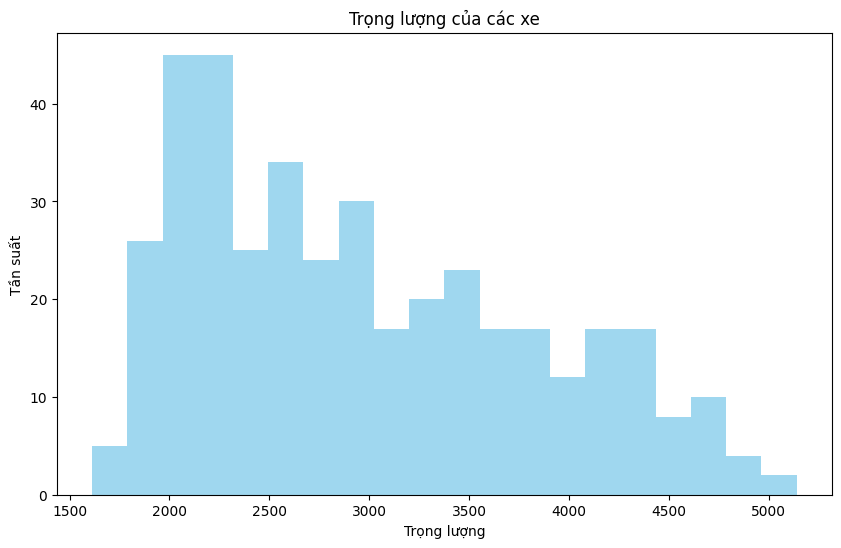

In [ ]:
#Vẽ Histogram trọng lượng các xe. Vẽ Boxplot so sánh công suất của các dòng xe thập niên 70 và 80.
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,6))
plt.hist(data['weight'], bins=20, color='skyblue', alpha=0.8)
plt.title('Trọng lượng của các xe')
plt.xlabel('Trọng lượng')
plt.ylabel('Tần suất')

C:\Users\BoCute\AppData\Local\Temp\ipykernel_13828\2962019120.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_70s['horsepower'].dropna(), data_80s['horsepower'].dropna()], labels=['1970', '1980'])


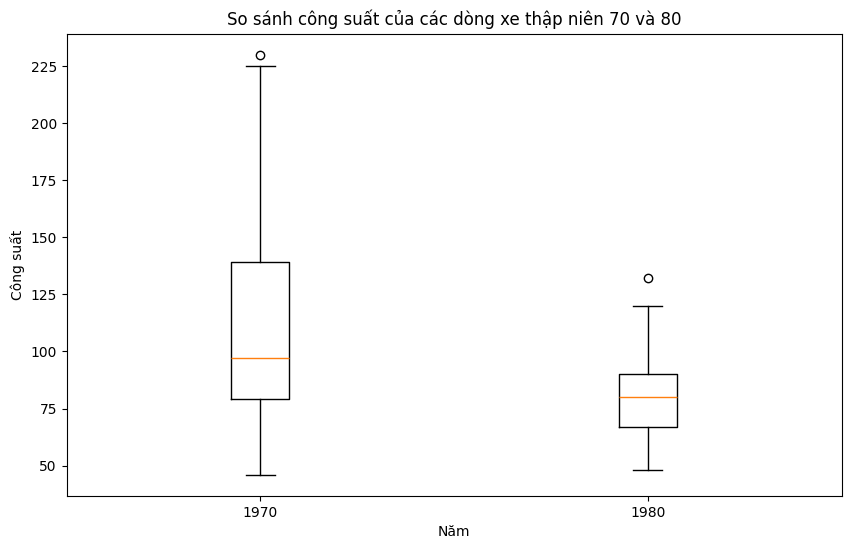

In [ ]:
#Vẽ Boxplot so sánh công suất của các dòng xe thập niên 70 và 80.
data_70s = data[(data['model_year'] >= 70) & (data['model_year'] <= 80)]
data_80s = data[(data['model_year'] >= 80) & (data['model_year'] <= 90)]
plt.subplots(figsize=(10,6))
plt.boxplot([data_70s['horsepower'].dropna(), data_80s['horsepower'].dropna()], labels=['1970', '1980'])
plt.title('Boxplot so sánh công suất của các dòng xe thập niên 70 và 80')
plt.ylabel('Công suất')
plt.xlabel('Năm')
plt.show()

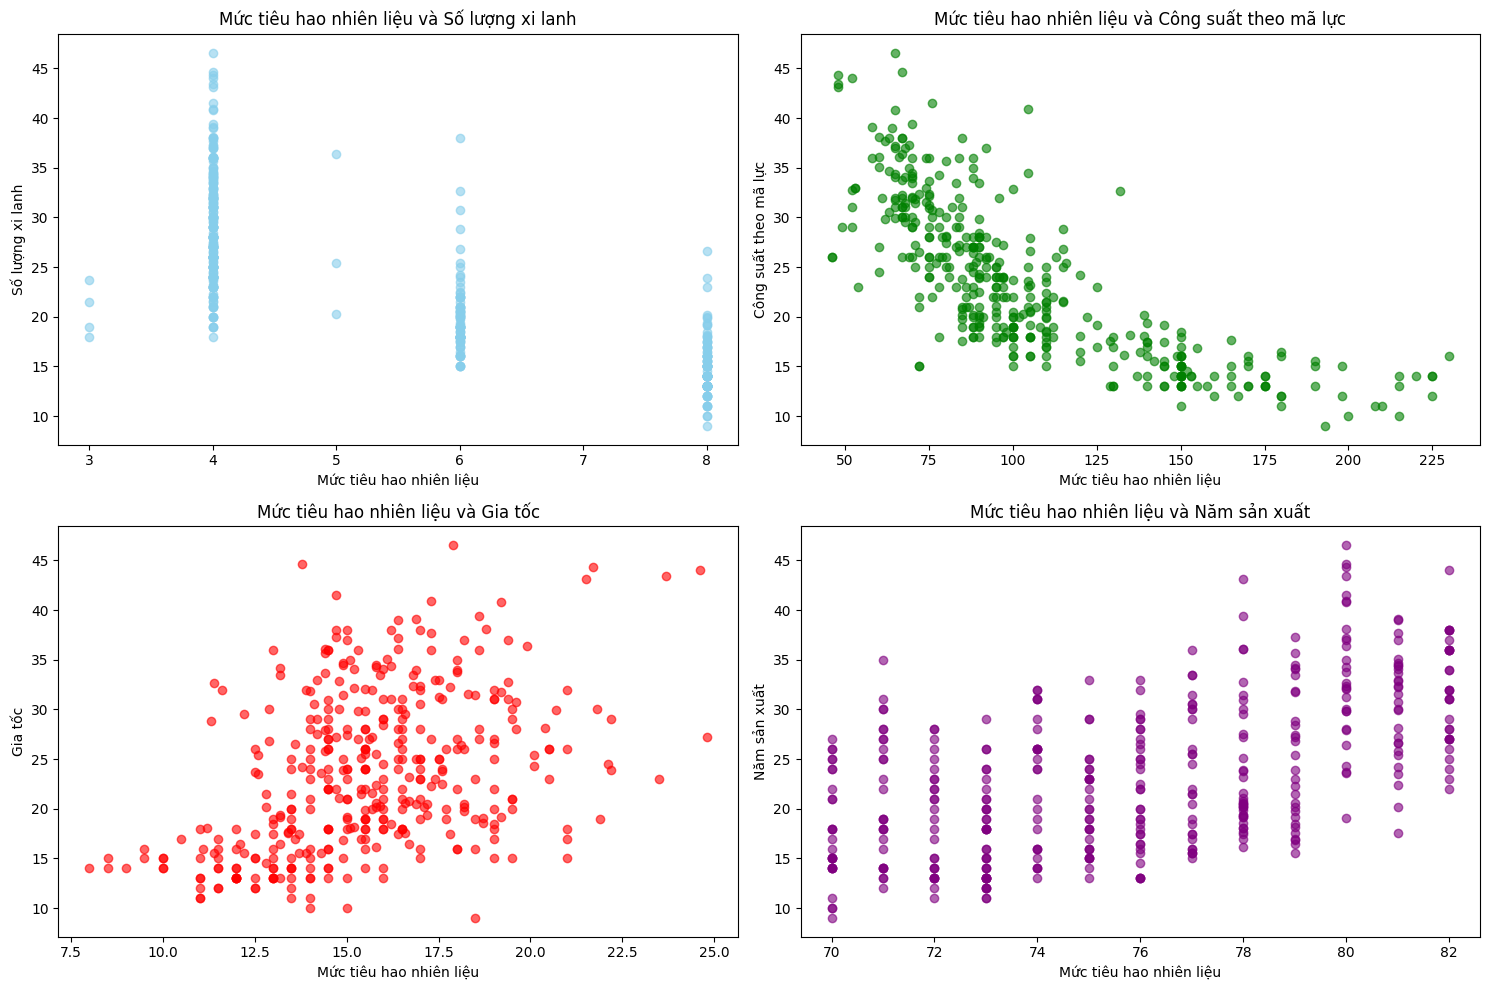

In [42]:
#Khảo sát mức tiêu hao nhiên liệu bằng Scatter Plot theo các thông số: Số lượng xi lanh; Công suất theo mã lực; Gia tốc, Năm sản suất


plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(data['cylinders'], data['mpg'], color='skyblue', alpha=0.6)
plt.title('Mức tiêu hao nhiên liệu và Số lượng xi lanh')
plt.ylabel('Số lượng xi lanh')
plt.xlabel('Mức tiêu hao nhiên liệu')

plt.subplot(2,2,2)
plt.scatter(data['horsepower'], data['mpg'], color='green', alpha=0.6)
plt.title('Mức tiêu hao nhiên liệu và Công suất theo mã lực')
plt.ylabel('Công suất theo mã lực')
plt.xlabel('Mức tiêu hao nhiên liệu')


plt.subplot(2,2,3)
plt.scatter(data['acceleration'], data['mpg'], color='red', alpha=0.6)
plt.title('Mức tiêu hao nhiên liệu và Gia tốc')
plt.ylabel('Gia tốc')
plt.xlabel('Mức tiêu hao nhiên liệu')

plt.subplot(2,2,4)
plt.scatter(data['model_year'], data['mpg'], color='purple', alpha=0.6)
plt.title('Mức tiêu hao nhiên liệu và Năm sản xuất')
plt.ylabel('Năm sản xuất')
plt.xlabel('Mức tiêu hao nhiên liệu')

plt.tight_layout()
plt.show()